**Работа с реальными данными**

# Импорт библиотек

In [416]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

In [417]:
import warnings
warnings.filterwarnings('ignore')

#Набор данных

**Предсказание цены на дом**

Набор данных представляет собой 1460 строк и 79 переменных, описывающих (почти) каждый аспект жилых домов в Эймсе, штат Айова.

С помощью этого датасета решается задача регрессии - предсказать окончательную стоимость дома (перменная SalePrice).

Наша цель - увидеть, как те или иные признаки влияют на стоимость дома, а также их взаимосвязь друг с другом.

Так как признаков очень много, выберу по 5 самых интересующих меня категориальных и числовых признаков для будующей работы.

Выбранные числовые признаки:

LotArea (площадь участка в квадратных футах)

YearBuilt (год постройки)

BedroomAbvGr (кол-во спален выше уровня земли)

GarageArea (площадь гаража в квадратных футах)

MoSold (месяц продажи)

Выбранные категориальные признаки:

Street (тип дороги, ведущей к участку)

Utilities (тип доступных коммунальных услуг)

LotConfig (конфигурация участка)

Condition1 (близость к различным условиям)

RoofStyle (тип крыши)

Нашей целевой переменной остается SalePrice

#Загрузка данных

In [418]:
df = pd.read_csv('https://raw.githubusercontent.com/dariaValerievna/Analytics/refs/heads/dariaValerievna-homework-1/train.csv', delimiter = ',') # считываем файл из интернета
df #выведем DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [419]:
#запишем выбранные признаки в новые переменные
cat_columns_new = ['Street', 'Utilities', 'LotConfig', 'Condition1', 'RoofStyle']
num_columns_new = ['LotArea', 'YearBuilt', 'BedroomAbvGr', 'GarageArea', 'MoSold', 'SalePrice']

#удаляем из датафрейма остальные признаки
df = df.drop(columns=[col for col in df.columns if (col not in cat_columns_new) and (col not in num_columns_new)])

#выведем получившийся датафрейм
df

,LotArea,Street,Utilities,LotConfig,Condition1,YearBuilt,RoofStyle,BedroomAbvGr,GarageArea,MoSold,SalePrice
0,8450,Pave,AllPub,Inside,Norm,2003,Gable,3,548,2,208500
1,9600,Pave,AllPub,FR2,Feedr,1976,Gable,3,460,5,181500
2,11250,Pave,AllPub,Inside,Norm,2001,Gable,3,608,9,223500
3,9550,Pave,AllPub,Corner,Norm,1915,Gable,3,642,2,140000
4,14260,Pave,AllPub,FR2,Norm,2000,Gable,4,836,12,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Pave,AllPub,Inside,Norm,1999,Gable,3,460,8,175000
1456,13175,Pave,AllPub,Inside,Norm,1978,Gable,3,500,2,210000
1457,9042,Pave,AllPub,Inside,Norm,1941,Gable,4,252,5,266500
1458,9717,Pave,AllPub,Inside,Norm,1950,Hip,2,240,4,142125


#Предварительная обработка данных

Дублирую код из прошлой домашки:

https://colab.research.google.com/drive/1RaCp_IPl9wQaZbFvZYB56riRH0p7_Mps?usp=sharing

###Предварительная обработка числовых признаков

**Нормализация**

In [420]:
DF_norm  = df.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
Xmin = df[num_columns_new].min() # находим минимум (для каждого числового признака)
Xmax = df[num_columns_new].max() # находим максимум (для каждого числового признака)
                                                # ↓ каждый столбец делится на свою разницу максимума и минимума
DF_norm[num_columns_new] = (df[num_columns_new]- Xmin)/( Xmax - Xmin) # реализуем нормализацию. матричные операции работают
                                        # ↑ из каждого стобца вычитаем свой минимум

**Стандартизация**

In [421]:
DF_scaled = df.copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм
M = df[num_columns_new].mean() # находим среднее (для каждого числового признака)
STD = df[num_columns_new].std() # находим стандартное отклонение (для каждого числового признака)
DF_scaled[num_columns_new] = (df[num_columns_new]-M)/STD # реализуем стандартизацию. матричные операции работают

**Степенное преобразование**

In [422]:
DF_pow_trans = df.copy()

pt = PowerTransformer()

pt.fit(DF_pow_trans[num_columns_new]);

power = pt.transform(DF_pow_trans[num_columns_new])
df_power = pd.DataFrame(power, columns= num_columns_new)


**Визуализируем**

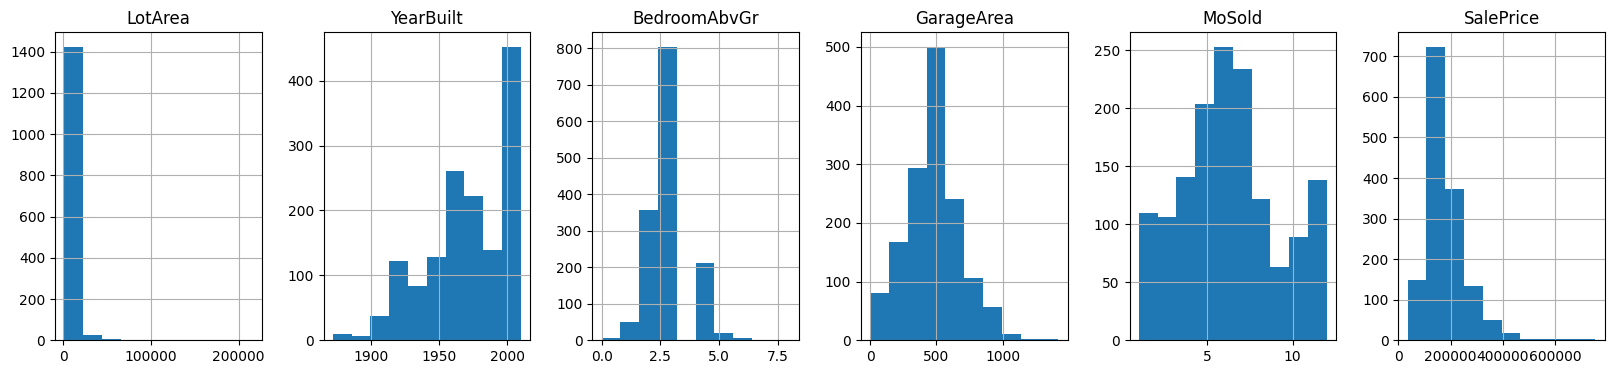

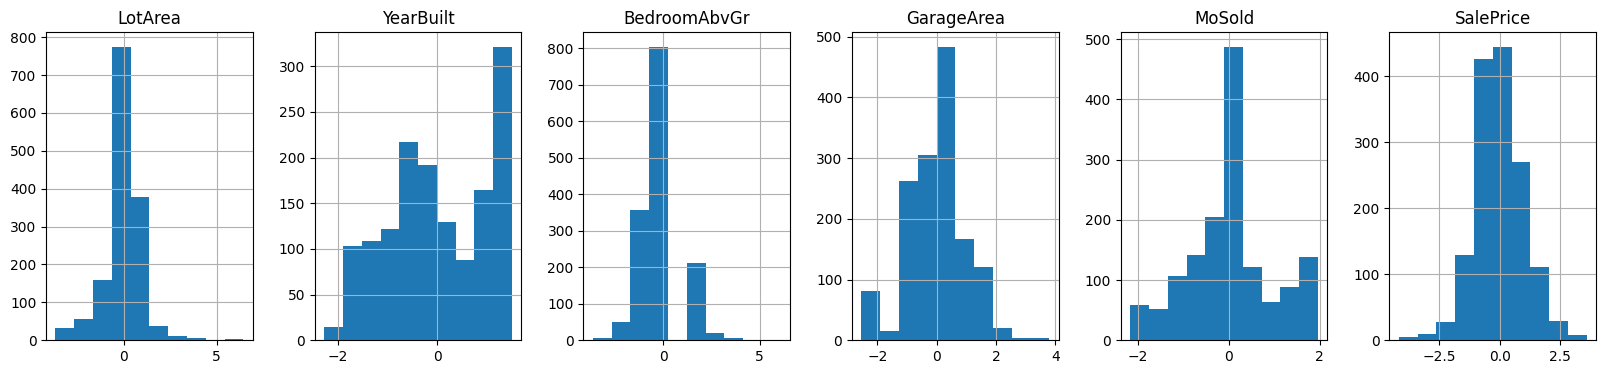

In [423]:
df[num_columns_new].hist(figsize = (20,4), layout= (1,6)); #исходные графики
df_power[num_columns_new].hist(figsize = (20,4), layout= (1,6));#преобразованные

###Предварительная обработка категориальных признаков

**Порядковое кодирование**

In [424]:
DF = df.copy()
ordinal = OrdinalEncoder()
ordinal.fit(DF[cat_columns_new]);

Ordinal_encoded = ordinal.transform(DF[cat_columns_new])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns_new)

**One-hot кодирование многозначных признаков**

In [425]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output= False)
ohe.fit(DF[cat_columns_new]);

ohe_feat = ohe.transform(DF[cat_columns_new])
#                                       ↓с помощью метода получаем полные имена One-Hot кодировки
df_ohe = pd.DataFrame(ohe_feat, columns = ohe.get_feature_names_out()).astype(int)

**Pipeline**

In [426]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        self.columns = X.columns

        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

    def get_feature_names_out(self, feature_names):
        return self.columns

In [427]:
num_pipe_lotArea = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01,)),
    ('scaler', StandardScaler())
])
num_lotArea = ['LotArea']

num_pipe_GarArea = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01,)),
    ('scaler', StandardScaler()),
     ('power', PowerTransformer())
])
num_GarArea = ['GarageArea']

num_pipe_BAG = Pipeline([
    ('power', PowerTransformer())
])
num_BAG = ['BedroomAbvGr']

num_pipe_YB = Pipeline([
    ('power', PowerTransformer())
])
num_YB = ['YearBuilt']

num_pipe_SP = Pipeline([
    ('power', PowerTransformer())
])
num_SP = ['SalePrice']

num_pipe_moSold = Pipeline([
    ('scaler', StandardScaler())
])
num_moSold = ['MoSold']

cat_pipe_street = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_street = ['Street']

cat_pipe_util = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_util = ['Utilities']

cat_pipe_lotCon = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_lotCon = ['LotConfig']

cat_pipe_con1 = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_con1 = ['Condition1']

cat_pipe_roofSt = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])
cat_roofSt = ['RoofStyle']

# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num_lotArea', num_pipe_lotArea, num_lotArea),
    ('num_GarArea', num_pipe_GarArea, num_GarArea),
    ('num_BAG', num_pipe_BAG, num_BAG),
    ('num_YB', num_pipe_YB, num_YB),
    ('num_moSold', num_pipe_moSold, num_moSold),
])

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=[
    ('num_lotArea', num_pipe_lotArea, num_lotArea),
    ('num_GarArea', num_pipe_GarArea, num_GarArea),
    ('num_BAG', num_pipe_BAG, num_BAG),
    ('num_YB', num_pipe_YB, num_YB),
    ('num_moSold', num_pipe_moSold, num_moSold),
    ('cat_street', cat_pipe_street, cat_street),
    ('cat_util', cat_pipe_util, cat_util),
    ('cat_lotCon', cat_pipe_lotCon, cat_lotCon),
    ('cat_con1', cat_pipe_con1, cat_con1),
    ('cat_roofSt', cat_pipe_roofSt, cat_roofSt),
])

In [428]:
# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_lotArea,
                    num_GarArea,
                    num_BAG,
                    num_YB,
                    num_moSold,
                    cat_street,
                    cat_util,
                    cat_lotCon,
                    cat_con1,
                    cat_roofSt,])

In [429]:
preprocessors.fit(DF);

#Линейная регрессия

In [430]:
from sklearn.linear_model import SGDRegressor # Линейная регрессия с градиентным спуском от scikit-learn

from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay # Класс визуализации ошибок модели

**Считываем данные, разбиваем на тренировочную и валидационную**

In [431]:
# не забываем удалить целевую переменную цену из признаков
X,y = DF.drop(columns = ['SalePrice']), DF['SalePrice']

# разбиваем на тренировочную и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

#Оценим модель с использованием только числовых данных

**Преобразуем данные**

In [432]:
# Сначала обучаем на тренировочных данных
preprocessors_num.fit(X_train)
X_train_prep = preprocessors_num.transform(X_train)
# потом на валидационной
X_val_prep = preprocessors_num.transform(X_val)

**Обучаем модель**

In [433]:
model = SGDRegressor(random_state = 42)

model.fit(X_train_prep, y_train);

#Подготовим несколько функций для анализа обученной модели

**вытаскивание коэффициентов из модели**

In [434]:
def get_coefs (model):
    B0=model.intercept_[0]
    B=model.coef_
    return B0, B

**написание модели**

In [435]:
def print_model (B0,B,features_names):
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

**визуализации весов в виде столбчатых диаграмм**

In [436]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers] # создаем "названия" весов
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

#Напишем уравнение модели

In [437]:
preprocessors_num.get_feature_names_out()

array(['num_lotArea__LotArea', 'num_GarArea__GarageArea',
       'num_BAG__BedroomAbvGr', 'num_YB__YearBuilt', 'num_moSold__MoSold'],
      dtype=object)

In [438]:
preprocessors_num.get_feature_names_out()[0]

'num_lotArea__LotArea'

In [439]:
preprocessors_num.get_feature_names_out()[0].split('__')

['num_lotArea', 'LotArea']

In [440]:
B0, B = get_coefs(model)
features_names = [x.split('__')[1] for x in preprocessors_num.get_feature_names_out()]
print_model(B0,B,features_names)

Решение
181352.707+15622.55*LotArea+28874.80*GarageArea+10236.77*BedroomAbvGr+28236.00*YearBuilt+2103.63*MoSold


#Визуализируем веса в виде столбчатых диаграмм

In [441]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Для интерпретации весов

In [442]:
preprocessors_num.named_transformers_['num_lotArea']['scaler'].mean_, preprocessors_num.named_transformers_['num_lotArea']['scaler'].scale_

(array([10425.29827789]), array([6026.58681161]))

In [443]:
preprocessors_num.named_transformers_['num_GarArea']['scaler'].mean_, preprocessors_num.named_transformers_['num_GarArea']['scaler'].scale_

(array([475.77559687]), array([204.33921965]))

In [444]:
preprocessors_num.named_transformers_['num_BAG']['power'].lambdas_

array([0.88661835])

In [445]:
preprocessors_num.named_transformers_['num_moSold']['scaler'].mean_, preprocessors_num.named_transformers_['num_moSold']['scaler'].scale_

(array([6.36399217]), array([2.64881817]))

In [446]:
preprocessors_num.named_transformers_['num_YB']['power'].lambdas_

array([22.36812477])

**Примерная интерпретация модели:**

Средняя цена дома 181.3527 тысяч долларов

Изменение площади участка (LotArea) на величину 1 стандартного отклонения (6026 кв.ф.) от средней площади (10425 км) приводит к увеличению стоимости на 15.6 тысяч долларов

Изменение площади гаража (GarageArea) на величину 1 стандартного отклонения (204 кв.ф.) от средней площади (475 км) приводит к увеличению стоимости на 28.9 тысяч долларов

Нельзя сказать, что чем больше спален, тем дом дороже.

Чем моложе дом, тем он дороже.

Месяц продажи вообще тут особо значения не имеет.

#Оценка метрик

In [447]:
#Расчет метрики
def calculate_metric(model_pipe, X, y, metric = r2_score):
    y_model = model_pipe.predict(X)
    return metric(y, y_model)

In [448]:
print(f"r2 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.5332
r2 на валидационной выборке: 0.5471
mse на тренировочной выборке: 2809510121.7980
mse на валидационной выборке: 3160538452.5403


#Кросс-валидация

In [449]:
#Расчет метрик на кросс-валидации
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [450]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           '-Max': 'max_error'}

In [451]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.008431,0.006267,0.576977,-3.272509e+09,-39122.911919,-276312.340352
1,0.005883,0.003797,0.416925,-2.663068e+09,-36494.258170,-189185.343564
2,0.004806,0.003928,0.660565,-2.088658e+09,-31950.393749,-169486.461988
3,0.004877,0.004648,0.402072,-2.191979e+09,-35015.583641,-185538.200533
4,0.004964,0.003723,0.607861,-1.985612e+09,-33588.597485,-174501.855482




test_R2      5.328799e-01
test_-MSE   -2.440365e+09
test_-MAE   -3.523435e+04
test_-Max   -1.990048e+05
dtype: float64


#Визуализация ошибок от scikit-learn

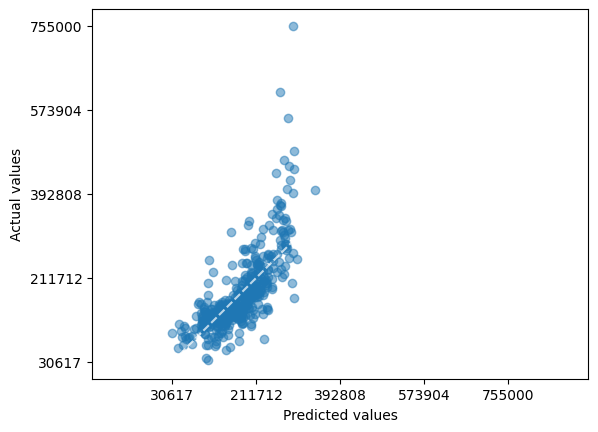

In [452]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model.predict(X_val_prep),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
line_kwargs = {"color" : 'white'}
);

**Небольшие выводы по модели:**

На графике представлена зависимость реальных значений от предсказанных. Модель показывает неплохую точность, так как точки располагаются близко к диагонали, но есть несколько выбросов.


#Объединяем Pipeline Предобработки и Модель

In [453]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', SGDRegressor(random_state = 42))
])

In [454]:
pipe_num['preprocessors']

ColumnTransformer(transformers=[('num_lotArea',
                                 Pipeline(steps=[('QuantReplace',
                                                  QuantileReplacer(threshold=0.01)),
                                                 ('scaler', StandardScaler())]),
                                 ['LotArea']),
                                ('num_GarArea',
                                 Pipeline(steps=[('QuantReplace',
                                                  QuantileReplacer(threshold=0.01)),
                                                 ('scaler', StandardScaler()),
                                                 ('power',
                                                  PowerTransformer())]),
                                 ['GarageArea']),
                                ('num_BAG',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['BedroomAbvGr']),
                                ('num_YB',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['YearBuilt']),
                                ('num_moSold',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['MoSold'])])

In [455]:
pipe_num['model']

SGDRegressor(random_state=42)

In [456]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_lotArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea']),
                                                 ('num_GarArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['GarageArea']),
                                                 ('num_BAG',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['BedroomAbvGr']),
                                                 ('num_YB',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['YearBuilt']),
                                                 ('num_moSold',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MoSold'])])),
                ('model', SGDRegressor(random_state=42))])

In [457]:
B0, B = get_coefs(pipe_num['model'])
features_names =  [x.split('__')[1] for x in pipe_num[:-1].get_feature_names_out()]

print_model (B0,B,features_names)

Решение
181352.707+15622.55*LotArea+28874.80*GarageArea+10236.77*BedroomAbvGr+28236.00*YearBuilt+2103.63*MoSold


In [458]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.5332
r2 на валидационной выборке: 0.5471
mse на тренировочной выборке: 2809510121.7980
mse на валидационной выборке: 3160538452.5403


In [459]:
cross_validation (X_train, y_train,
                  pipe_num,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.061614,0.023236,0.589269,-3.177418e+09,-38928.896427,-269712.667216
1,0.052892,0.019282,0.470851,-2.416774e+09,-35130.395123,-178681.636679
2,0.046074,0.014501,0.658180,-2.103328e+09,-31983.858056,-172802.607461
3,0.035359,0.013544,0.463651,-1.966233e+09,-34022.026169,-157240.883932
4,0.044466,0.014185,0.601853,-2.016033e+09,-33858.335000,-174612.192583




test_R2      5.567609e-01
test_-MSE   -2.335957e+09
test_-MAE   -3.478470e+04
test_-Max   -1.906100e+05
dtype: float64


#Оценим влияние предварительной обработки целевой переменной

In [460]:
from sklearn.compose import TransformedTargetRegressor

In [461]:
pipe_num_transform = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', TransformedTargetRegressor(
        regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [462]:
pipe_num_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_lotArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea']),
                                                 ('num_GarArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['GarageArea']),
                                                 ('num_BAG',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['BedroomAbvGr']),
                                                 ('num_YB',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['YearBuilt']),
                                                 ('num_moSold',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MoSold'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [463]:
B0, B = get_coefs(pipe_num_transform['model'].regressor_)
features_names = [x.split('__')[1] for x in pipe_num_transform[:-1].get_feature_names_out()]

print_model (B0,B,features_names)

Решение
-0.000+0.17*LotArea+0.39*GarageArea+0.19*BedroomAbvGr+0.43*YearBuilt+0.04*MoSold


In [464]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

**Интерпретация:**

Все признаки положительно влияют на цену дома.

Чем больше площадь участка, чем больше площадь гаража, чем больше спален в доме и чем новее дом, тем дороже его стоимость.

In [465]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_num_transform, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_num_transform, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_num_transform, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_num_transform, X_val, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.5517
r2 на валидационной выборке: 0.5820
mse на тренировочной выборке: 2698198044.0420
mse на валидационной выборке: 2917110735.3577


In [466]:
cross_validation (X_train, y_train,
                  pipe_num_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.050837,0.025129,0.623867,-2.909765e+09,-36257.663273,-242877.340832
1,0.044202,0.015127,0.430674,-2.600273e+09,-32792.356005,-238008.484033
2,0.051717,0.017912,0.707606,-1.799195e+09,-28637.577383,-163255.971539
3,0.054785,0.014159,0.467478,-1.952204e+09,-30664.204889,-196523.332133
4,0.049020,0.016862,0.644054,-1.802346e+09,-29919.916972,-186672.571243




test_R2      5.747359e-01
test_-MSE   -2.212756e+09
test_-MAE   -3.165434e+04
test_-Max   -2.054675e+05
dtype: float64


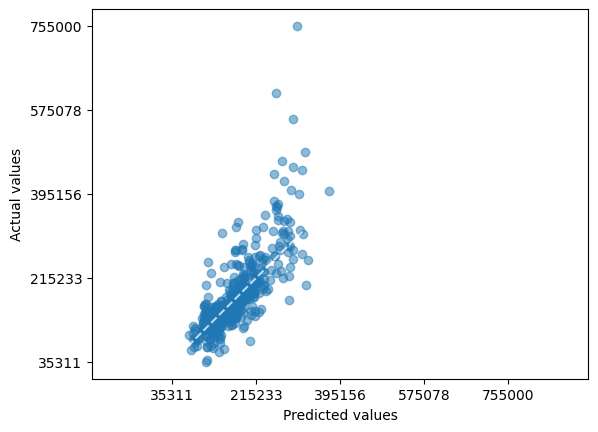

In [467]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_num_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    line_kwargs = {"color" : 'white'}
);

**Небольшие выводы по модели:**

Немного улучшился r2: 0.53 -> 0.57

Модель работает не идеально, есть значительное количество выбросов, особенно в области высоких цен на дома, но в целом можно говорить о хорошей корреляции между предсказанными и реальными значениями цен на дома.



#Оценим влияние категориальных признаков

In [468]:
pipe_all_transform = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', TransformedTargetRegressor(
         regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [469]:
pipe_all_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_lotArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea']),
                                                 ('num_GarArea',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['GarageArea']),
                                                 ('num...
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Condition1']),
                                                 ('cat_roofSt',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['RoofStyle'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [470]:
cat_street_names = pipe_all_transform['preprocessors'].transformers_[5][1]['encoder'].get_feature_names_out(cat_street)
cat_util_names = pipe_all_transform['preprocessors'].transformers_[6][1]['encoder'].get_feature_names_out(cat_util)
cat_lotCon_names = pipe_all_transform['preprocessors'].transformers_[7][1]['encoder'].get_feature_names_out(cat_lotCon)
cat_con1_names = pipe_all_transform['preprocessors'].transformers_[8][1]['encoder'].get_feature_names_out(cat_con1)
cat_roofSt_names = pipe_all_transform['preprocessors'].transformers_[9][1]['encoder'].get_feature_names_out(cat_roofSt)


# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_lotArea,
                    num_GarArea,
                    num_BAG,
                    num_YB,
                    num_moSold,
                    cat_street,
                    cat_util,
                    cat_lotCon,
                    cat_con1,
                    cat_roofSt,])

In [471]:
columns = [x.split('__')[1] for x in pipe_all_transform[:-1].get_feature_names_out()]

In [472]:
B0, B = get_coefs(pipe_all_transform['model'].regressor_)
features_names = list(columns)

print_model (B0,B,features_names)

Решение
0.001+0.15*LotArea+0.38*GarageArea+0.18*BedroomAbvGr+0.42*YearBuilt+0.04*MoSold+0.03*Street_Pave-0.00*Utilities_NoSeWa-0.01*LotConfig_Corner+0.08*LotConfig_CulDSac-0.06*LotConfig_FR2+0.00*LotConfig_FR3-0.01*LotConfig_Inside-0.02*Condition1_Artery-0.08*Condition1_Feedr+0.10*Condition1_Norm+0.02*Condition1_PosA+0.03*Condition1_PosN-0.06*Condition1_RRAe+0.01*Condition1_RRAn+0.00*Condition1_RRNe+0.01*Condition1_RRNn+0.00*RoofStyle_Flat-0.16*RoofStyle_Gable+0.04*RoofStyle_Gambrel+0.10*RoofStyle_Hip+0.01*RoofStyle_Mansard+0.01*RoofStyle_Shed


**Модификация функции для отрисовки весов**

In [473]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    """Отрисовка весов с фильтром.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    threshold: порог "значимости" коэффициентов
    """
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # Рисуем столбчатую диаграмму
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [474]:
Bs = np.hstack([B0,B])
fig = plt.figure(figsize = (15,5))
vis_weigths_threshold(Bs,columns, 0.1);

<Figure size 1500x500 with 0 Axes>

Несмотря на то, что делала все по блокноту, почему то категориальные варинаты не отражаются.


In [475]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.5870
r2 на валидационной выборке: 0.6017
mse на тренировочной выборке: 2485422141.4620
mse на валидационной выборке: 2779216742.3912


In [476]:
cross_validation (X_train, y_train,
                  pipe_all_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.087389,0.041728,0.647222,-2.729094e+09,-34587.608311,-215590.648009
1,0.074598,0.027111,0.452445,-2.500837e+09,-31291.263603,-252074.758608
2,0.064416,0.021767,0.735922,-1.624959e+09,-27414.147864,-169477.142020
3,0.060894,0.024256,0.477111,-1.916891e+09,-29051.842416,-212703.164859
4,0.059965,0.020789,0.647368,-1.785567e+09,-30094.394716,-190689.207750




test_R2      5.920135e-01
test_-MSE   -2.111470e+09
test_-MAE   -3.048785e+04
test_-Max   -2.081070e+05
dtype: float64


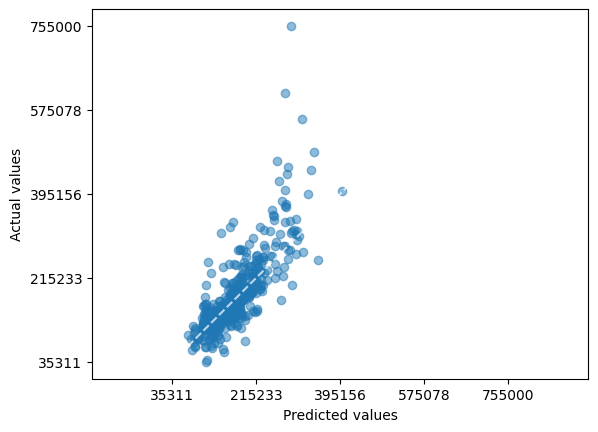

In [477]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_all_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
        line_kwargs = {"color" : 'white'}
);

**Выводы по модели:**

Немного улучшился r2: 0.57 -> 0.59

Модель в целом неплохо справляется с предсказанием цен на дома. На графике видно, что есть небольшое количество выбросов, но в целом прогнозные значения хорошо соотвествуют фактическим.  

